---
title: 文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量
date: 2018-08-18 18:17:55
tags: [python, 文本挖掘]
toc: true
xiongzhang: true
xiongzhang_images: [main.jpg]

---
<span></span>
<!-- more -->


### 系列文章

这个是系列博客, 所有文章链接都列在这里, 并持续更新中。

<ul>
<li><a href="http://mlln.cn/2018/08/17/文本向量化理论和实践教程/" >文本向量化理论和实践教程</a></li>
<li><a href="http://mlln.cn/2018/08/17/文本向量系列-如何基于拼音构建字向量/" >文本向量系列-如何基于拼音构建字向量</a></li>
<li><a href="http://mlln.cn/2018/08/18/文本向量系列-如何基于笔画+拼音构建字向量/" >文本向量系列-如何基于笔画+拼音构建字向量/</a></li>
<li><a href="http://mlln.cn/2018/08/18/文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量/" >文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量/</a></li>
</ul>

### 篇章/词频矩阵

基于矩阵的分布表示通常又称为语义分布模型ＰＵ，该方法的主要思想是构建一个共现矩阵，矩阵的每行对应一个单词，每列表示一种上下文(通常是一篇文章)，而每个元素的值为对应单词与上下文在语料库中的共现次数。因此，每个单词可由矩阵中对应的行向量表示，而任意两个单词的相似性可直接由它们向量的相似性衡量。

下面就是一个共现矩阵, 每一行就是一个词向量:

<a href="http://mlln.cn">
<table>
    <tr><td></td><td>文档1</td><td>文档2</td><td>文档3</td><td>...</td></tr>
    <tr><td>词1</td><td>1</td><td>0</td><td>3</td><td>...</td></tr>
    <tr><td>词2</td><td></td><td>1</td><td>0</td><td>...</td></tr>
    <tr><td>词3</td><td>1</td><td>0</td><td>0</td><td>...</td></tr>
    <tr><td>.</td><td>13</td><td>4</td><td>3</td><td>...</td></tr>
</table>
</a>

### TF-IDF权重

TF-IDF基于上面提到的共现矩阵。从实际操作角度来说, [TF-IDF](http://mlln.cn)只是对共现矩阵进行了加权。

传统经典模型TF-IDF以及一些基于它改进的方法:主要思想是通过提取文本中词语的权重来标识句子, 使文本构成向量表达。权重主要由两部分组成, 即该词语在文本中的频率 (term frequency, TF) 与反文档频率 (inverse document frequency, IDF) 。它衡量了一个词的常见程度，TF-IDF的假设是：如果某个词或短语在一篇文章中出现的频率高，并且在其他文章中很少出，那么它很可能就反映了这篇文章的特性，因此要提高它的权值。然而这种方法太过于依赖词语的共现, 加上本身短文本消息就由很少的字组成, 往往实际应用中得不到很好的效果。因为两个文本消息可能没有共同的词语但也可以语义相关, 相反如果两个文本消息有一些共同的词语也不一定语义相关。如”富士苹果很好吃, 赶紧买”, “苹果六代真好用, 赶紧买”和”乔布斯逝世了”。

### 语料库

因为中文语料库往往需要涉及[分词](http://mlln.cn), 之后分词后才能对词进行向量化, 但是目前分词还不是我们教程的内容, 所以为了降低学习难度, 我们使用英文作为这次教程的语料库, 这个语料库比较小, 只有几个文档, 我们直接写在代码里了:

In [1]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

### 计算词典和词频数矩阵

词典就是词到词id的映射, 这样我们可以用id(一个整数)表示一个词了。词频矩阵参考上面的表格。

In [7]:
from collections import Counter
from itertools import chain
import numpy as np

def word_matrix(documents):
    '''计算词频矩阵'''
    # 所有字母转换位小写
    docs = [d.lower() for d in documents]
    # 分词
    docs = [d.split() for d in docs]
    # 获取所有词
    words = list(set(chain(*docs)))
    # 词到ID的映射, 使得每个词有一个ID
    dictionary = dict(zip(words, range(len(words))))
    # 创建一个空的矩阵, 行数等于词数, 列数等于文档数
    matrix = np.zeros((len(words), len(docs)))
    # 逐个文档统计词频
    for col, d in enumerate(docs):
        # 统计词频
        count = Counter(d)
        for word in count:
            # 用word的id表示word在矩阵中的行数
            id = dictionary[word]
            # 把词频赋值给矩阵
            matrix[id, col] = count[word]
    return matrix, dictionary

matrix, dictionary = word_matrix(documents)


In [39]:
print(matrix[:10,:10])
dictionary

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]]


{'unordered': 0,
 'engineering': 1,
 'opinion': 2,
 'minors': 3,
 'eps': 4,
 'abc': 5,
 'iv': 6,
 'management': 7,
 'machine': 8,
 'system': 9,
 'random': 10,
 'ordering': 11,
 'well': 12,
 'the': 13,
 'relation': 14,
 'a': 15,
 'perceived': 16,
 'and': 17,
 'of': 18,
 'graph': 19,
 'widths': 20,
 'computer': 21,
 'quasi': 22,
 'user': 23,
 'lab': 24,
 'for': 25,
 'trees': 26,
 'to': 27,
 'binary': 28,
 'time': 29,
 'testing': 30,
 'in': 31,
 'survey': 32,
 'error': 33,
 'human': 34,
 'intersection': 35,
 'paths': 36,
 'interface': 37,
 'applications': 38,
 'measurement': 39,
 'generation': 40,
 'response': 41}

In [9]:
print(dictionary)

{'unordered': 0, 'engineering': 1, 'opinion': 2, 'minors': 3, 'eps': 4, 'abc': 5, 'iv': 6, 'management': 7, 'machine': 8, 'system': 9, 'random': 10, 'ordering': 11, 'well': 12, 'the': 13, 'relation': 14, 'a': 15, 'perceived': 16, 'and': 17, 'of': 18, 'graph': 19, 'widths': 20, 'computer': 21, 'quasi': 22, 'user': 23, 'lab': 24, 'for': 25, 'trees': 26, 'to': 27, 'binary': 28, 'time': 29, 'testing': 30, 'in': 31, 'survey': 32, 'error': 33, 'human': 34, 'intersection': 35, 'paths': 36, 'interface': 37, 'applications': 38, 'measurement': 39, 'generation': 40, 'response': 41}


### TF-IDF权重计算

#### 计算TF

词在每个文档中的频数已经由上面的步骤计算得到, 下面我们要计算TF(词频率term frequency), 它其实就是每个词的频数除以文档的总词数:

<a href="http://mlln.cn"><img src="tf.svg" /></a>

In [12]:
def tf(matrix):
    # 计算每个文档的总次数
    sm = np.sum(matrix, axis=0)
    print(sm)
    # 每个词的词频除以每个文档的词频
    return matrix / sm

tf(matrix)[:5, :5]

[ 8. 10.  6.  8.  9.  7.  7. 10.  4.]


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.125     , 0.        ],
       [0.        , 0.1       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.16666667, 0.125     , 0.        ]])

#### 计算IDF

逆向文件频率（inverse document frequency，IDF）是一个词语普遍重要性的度量, 某一特定词语的idf，可以由总文件数目除以包含该词语之文件的数目，再将得到的商取以10为底的对数得到：
<a href="http://mlln.cn"><img src="idf.svg" /></a>

其中:

|D|: 语料库中的文档总数
分子: 包含词ti的文档数

下面我们用代码来计算idf:

In [17]:
def idf(matrix):
    '''计算IDF'''
    # 文档总数
    D = matrix.shape[1]
    # 包含每个词的文档数
    j = np.sum(matrix>0, axis=1)
    print(j)
    return D / j

idf(matrix)

[1 1 1 2 2 1 1 1 1 3 1 1 1 3 1 2 1 2 6 3 1 2 1 3 1 1 3 1 1 2 1 1 2 1 2 1 1
 2 1 1 1 2]


array([9. , 9. , 9. , 4.5, 4.5, 9. , 9. , 9. , 9. , 3. , 9. , 9. , 9. ,
       3. , 9. , 4.5, 9. , 4.5, 1.5, 3. , 9. , 4.5, 9. , 3. , 9. , 9. ,
       3. , 9. , 9. , 4.5, 9. , 9. , 4.5, 9. , 4.5, 9. , 9. , 4.5, 9. ,
       9. , 9. , 4.5])

#### 计算tf-idf

这个就很简单了:

<a href="http://mlln.cn"><img src="tf-idf.svg" /></a>

下面是用代码实现的tf-idf函数:

In [21]:
def tf_idf(matrx):
    return tf(matrix) * idf(matrix).reshape(matrix.shape[0], 1)

weights = tf_idf(matrix)
weights[:5, :5]

[ 8. 10.  6.  8.  9.  7.  7. 10.  4.]
[1 1 1 2 2 1 1 1 1 3 1 1 1 3 1 2 1 2 6 3 1 2 1 3 1 1 3 1 1 2 1 1 2 1 2 1 1
 2 1 1 1 2]


array([[0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 1.125 , 0.    ],
       [0.    , 0.9   , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.75  , 0.5625, 0.    ]])

### 词向量

我们得到了weights矩阵, 它的每一行就是一个词的词向量, 每一列就是一个文档的向量, 如果要计算词的相似性可以计算行向量的余弦值, 如果要计算文档的相似性, 我们可以计算列向量的余弦值。

下面分别计算词和文档的相关矩阵:

#### 词相关矩阵

由于语料库太小了, 只有十几篇文档, 导致很多词的词向量都是相同的, 所以计算得到的词之间的相关很可能出现一些强相关, 但并不意味着他们由语义相关。但是在语料库比较大的时候, 很难出现两个词的词向量相同, 哪怕两个词是同义词也不太可能。

但是, 就今天的例子而言, 结果不是很好。大部分cosine值都是1附近, 说明词之间的相关几乎是0。这种方法的效果较差, 很难揭示语义相似性。

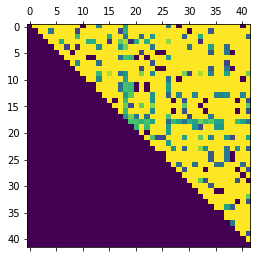

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


def word_relations(weights, ):
    relations = np.zeros((len(weights), len(weights)))
    for i in range(len(weights)):
        vec1 = weights[i]
        for j in range(i, len(weights)):
            vec2 = weights[j]
            relations[i, j] = cosine(vec1, vec2)
    reverse = dict(zip(dictionary.values(), dictionary.keys()))
    plt.matshow(relations)
    
word_relations(weights)
    

#### 文档相关矩阵

我们得到词向量的同时也得到了文档向量, 我们可以计算文档之间的相关性几乎是没有的, 这不符合我们的直观感受。

[[0.         0.93513419 0.92300095 0.94191977 1.         1.
  1.         1.         1.        ]
 [0.         0.         0.89788806 0.90372145 0.82532862 0.98323348
  0.98114633 0.98558537 0.66476436]
 [0.         0.         0.         0.80571111 0.96544268 0.96019457
  0.95523946 1.         1.        ]
 [0.         0.         0.         0.         0.99348337 0.99249371
  0.9915593  0.93546641 1.        ]
 [0.         0.         0.         0.         0.         0.99432578
  0.99361943 0.99512172 1.        ]
 [0.         0.         0.         0.         0.         0.
  0.93385392 0.97190435 1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.94313243 0.93468898]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.83771539]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


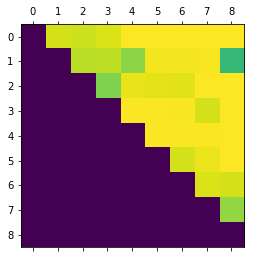

In [37]:
def doc_relations(weights):
    n = weights.shape[1]
    relations = np.zeros((n, n))
    for i in range(n):
        vec1 = weights[:, i]
        for j in range(i, n):
            vec2 = weights[:, j]
            relations[i, j] = cosine(vec1, vec2)
    reverse = dict(zip(dictionary.values(), dictionary.keys()))
    plt.matshow(relations)
    print(relations)
    
doc_relations(weights)